In [25]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [60]:
#Read file into a list
fname = "/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/KeepUp Challenge/amazon-meta.txt"
with open(fname, encoding = 'utf8') as f:
    content = f.readlines()
#after reading the lines and separating with , trim the spaces out
content = [x.strip() for x in content] 
 
#Write to a new txt file using , as delimiter
#Write the content into file only when all information are available. Hence,
#If the data isn't complete it won't be written

file = open("testfile.txt","w", encoding='utf8') #open a new text file
columns = ['Id','ASIN', 'title', 'group','salesrank', 'categories', 'totalreviews', 'avgrating'] #setup the columns
for line in content: #loop through the lines stripped from the raw file
    lines = line.split(':')
    if lines[0] == "Id":
        if (len(columns) == 8):
            for component in columns[0:7]:
                file.write(component)
                file.write(',')
            file.write(columns[7])
            file.write("\n")
        columns = []
        columns.append(lines[1].strip())
         
    if lines[0] == "ASIN":
        columns.append(lines[1].strip())
        
    if lines[0] == "title":
        title = ':'.join(lines[1:]).strip().replace(',', ' ').replace('\n', ' ').strip()
        columns.append(title)
        
    if lines[0] == "group":
        columns.append(lines[1].strip())
        
    if lines[0] == "salesrank":
        columns.append(lines[1].strip()) 
        
    if lines[0] == "categories":
        columns.append(lines[1].strip())
        
    if lines[0] == "reviews" and lines[1].strip() == "total":
        columns.append(lines[2].split(' ')[1])
        columns.append(lines[4].strip())
file.close()

In [97]:
#get the values of the IDs and categories
#prodid=[]
cat=[]
#catdict={}
for line in content:
#    lines = line.split(':')
#    if lines[0] == "Id":
#        cat.append(lines[1].strip())
    a=re.findall(r'\[(\w+)\]',line)
    if a:
        cat.append(a)

In [99]:
#get the names of the IDs categories
#prodid=[]
catName=[]
#catdict={}
for line in content:
#    lines = line.split(':')
#    if lines[0] == "Id":
#        catName.append(lines[1].strip())
    a=re.findall(r'\|(\w+)',line)
    if a:
        catName.append(a)

In [98]:
dfcatVal = pd.DataFrame({'col':cat})
dfcatVal.head(5)

,col
0,"[283155, 1000, 22, 12290, 12360, 12368]"
1,"[283155, 1000, 22, 12290, 12360, 12370]"
2,"[283155, 1000, 22, 12472, 12484]"
3,"[283155, 1000, 22, 12472, 12486]"
4,"[283155, 1000, 48, 5126, 5144]"


In [141]:
dfcatName = pd.DataFrame({'col':catName})
dfcatName

,col
0,"[Books, Subjects, Religion, Christianity, Cler..."
1,"[Books, Subjects, Religion, Christianity, Cler..."
2,"[Books, Subjects, Religion, Earth, Wicca]"
3,"[Books, Subjects, Religion, Earth, Witchcraft]"
4,"[Books, Subjects, Home, Crafts, General]"
5,"[Books, Subjects, Religion, Christianity, Refe..."
6,"[Books, Subjects, Religion, Christianity, Chri..."
7,"[Books, Subjects, Religion, Christianity, Bibl..."
8,"[Books, Subjects, Religion, Bible, Bible, New]"
9,"[Books, Subjects, Religion, Christianity, Bibl..."


In [76]:
#dfcatName=dfcatName.loc[dfcatName['col'].str.len()>6]

In [101]:
dfcatName['stringCount']=dfcatName['col'].str.len()

In [104]:
uniqueCat = np.unique(dfcatName['col'])

In [112]:
uniqueCat.shape

(35406,)

In [114]:
uniqueCat

array([list(['3D']), list(['Age', '12', 'Activities', 'All']),
       list(['Age', '12', 'Arts', 'All']), ...,
       list(['VHS', 'Specialty', 'Yoga', 'Yoga', 'Gaiam']),
       list(['VHS', 'Specialty', 'Yoga', 'Yoga', 'Yoga']), list(['XSI'])], dtype=object)

In [31]:
dfTest = pd.read_csv('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/KeepUp Challenge/testfile.txt',sep=',')

In [32]:
dfTest.head()

,Id,ASIN,title,group,salesrank,categories,totalreviews,avgrating
0,1,0827229534,Patterns of Preaching: A Sermon Sampler,Book,396585,2,2,5.0
1,2,0738700797,Candlemas: Feast of Flames,Book,168596,2,12,4.5
2,3,0486287785,World War II Allied Fighter Planes Trading Cards,Book,1270652,1,1,5.0
3,4,0842328327,Life Application Bible Commentary: 1 and 2 Tim...,Book,631289,5,1,4.0
4,5,1577943082,Prayers That Avail Much for Business: Executive,Book,455160,2,0,0.0


In [33]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542683 entries, 0 to 542682
Data columns (total 8 columns):
Id              542683 non-null int64
ASIN            542683 non-null object
title           542683 non-null object
group           542683 non-null object
salesrank       542683 non-null int64
categories      542683 non-null int64
totalreviews    542683 non-null int64
avgrating       542683 non-null float64
dtypes: float64(1), int64(4), object(3)
memory usage: 33.1+ MB


In [37]:
dfTest.describe()

,Id,salesrank,categories,totalreviews,avgrating
count,542683.000000,5.426830e+05,542683.000000,542683.000000,542683.000000
mean,274413.707057,4.893252e+05,4.624602,14.339843,3.209531
std,158454.188293,5.677231e+05,4.450651,74.768436,1.996296
min,1.000000,-1.000000e+00,0.000000,0.000000,0.000000
25%,137161.500000,9.074400e+04,2.000000,0.000000,0.000000
50%,274427.000000,3.004930e+05,4.000000,2.000000,4.000000
75%,411673.500000,6.720695e+05,6.000000,8.000000,5.000000
max,548550.000000,3.798351e+06,116.000000,5545.000000,5.000000


# Q1 Ratings

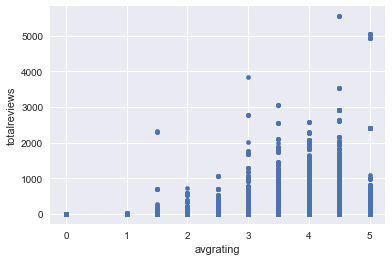

In [116]:
dfTest.plot(x='avgrating',y='totalreviews',kind='scatter',)

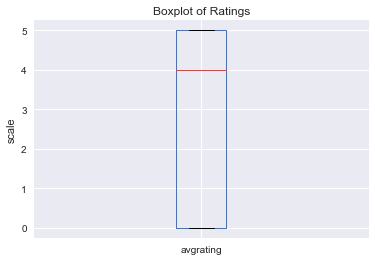

In [129]:
dfTest['avgrating'].plot.box()
plt.title('Boxplot of Ratings')
plt.ylabel('scale')

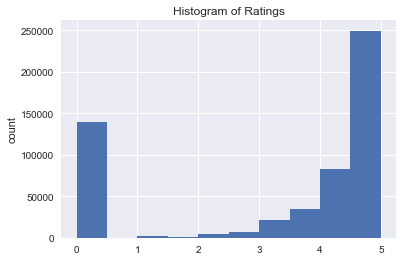

In [128]:
dfTest['avgrating'].hist()
plt.title('Histogram of Ratings')
plt.ylabel('count')

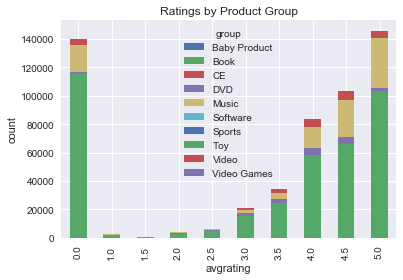

In [127]:
dfTest.groupby(['avgrating','group'])['avgrating'].count().unstack().plot.bar(stacked=True)
plt.title('Ratings by Product Group')
plt.ylabel('count')

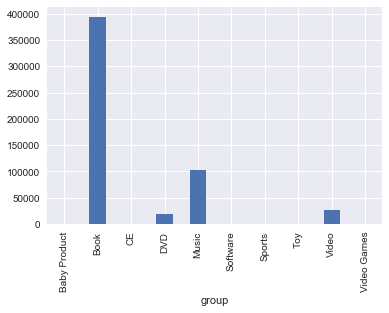

In [34]:
dfTest.groupby(['group'])['Id'].count().plot.bar()

In [138]:
dfTest['totalreviews'].max()

5545

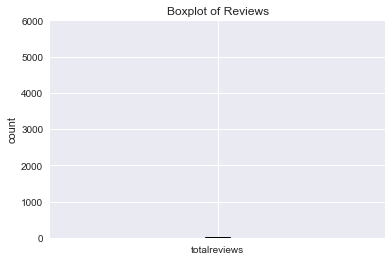

In [139]:
dfTest['totalreviews'].plot.box()
plt.title('Boxplot of Reviews')
plt.ylim(0,6000)
plt.ylabel('count')

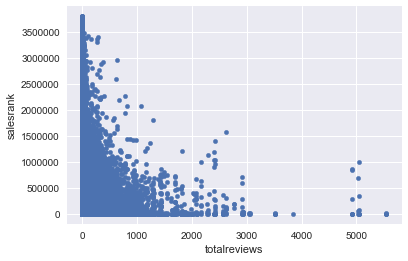

In [133]:
dfTest.plot(x='totalreviews',y='salesrank',kind='scatter')

# Q2 Categories

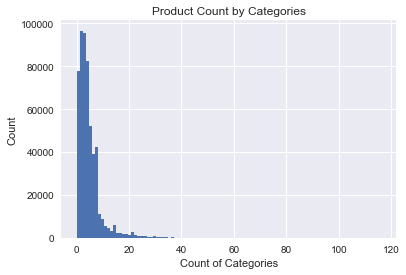

In [143]:
dfTest['categories'].hist(bins=100)
plt.title('Product Count by Categories')
plt.xlabel('Count of Categories')
plt.ylabel('Count')

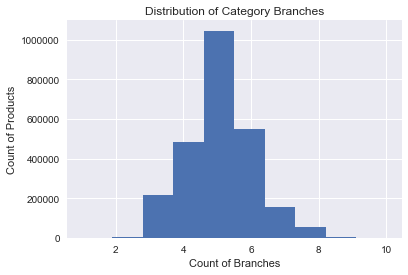

In [140]:
dfcatName['stringCount'].hist()
plt.title('Distribution of Category Branches')
plt.ylabel('Count of Products')
plt.xlabel('Count of Branches')

In [113]:
dfcatName.describe()

,stringCount
count,2.509701e+06
mean,5.046325e+00
std,1.109619e+00
min,1.000000e+00
25%,4.000000e+00
50%,5.000000e+00
75%,6.000000e+00
max,1.000000e+01
